<a href="https://colab.research.google.com/github/ys09123/smart-rent-advisor/blob/main/notebooks/eda_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Smart Rent Advisor

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset

In [2]:
url = "https://raw.githubusercontent.com/ys09123/smart-rent-advisor/refs/heads/main/data/raw/house_rent.csv"
df = pd.read_csv(url)

## 3. Initial Data Overview

In [9]:
df.shape

(4746, 12)

In [10]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [19]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [54]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [13]:
df['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [14]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [15]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [16]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## 4. Visualizations

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [23]:
import matplotlib.ticker as mtick

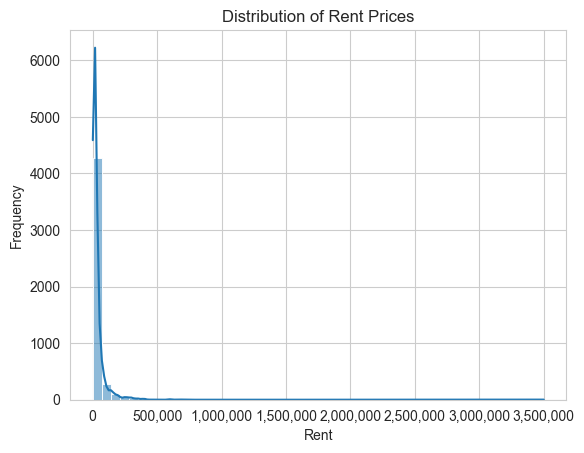

In [24]:
# a. Rent Distribution
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

### Checked the rent distribution and found it was skewed

In [43]:
high_rent_props = df[df['Rent'] > 200000]
print(f"Number of properties with rent > ₹2,00,000: {len(high_rent_props)}")

percent = (len(high_rent_props) / len(df)) * 100
print(f"That's about {percent:.2f}% of the total dataset.")

Number of properties with rent > ₹2,00,000: 99
That's about 2.09% of the total dataset.


### Note:
We removed rents > 1,00,000 (top 6%) to avoid skews plots.

In [4]:
import sys
import os

# Add the root directory of your project to the system path
sys.path.append(os.path.abspath(".."))

In [5]:
from src.data_cleaning import clean_rent_data

df_cleaned = clean_rent_data(df)

e:\Users\Yash Shaw\Documents\Programming Notes\Python Programs\smart-rent-advisor\src\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Area Type', 'Point of Contact', 'Posted On'], inplace=True)


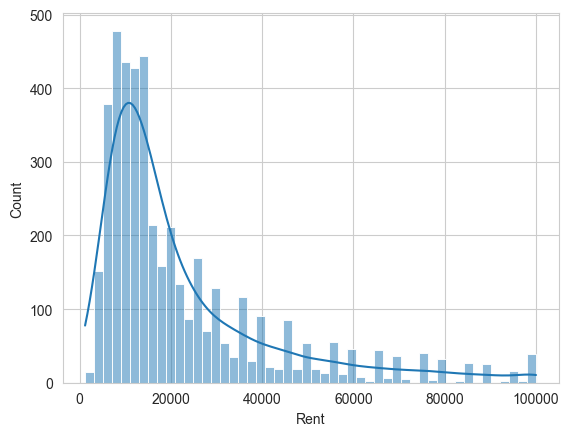

In [64]:
sns.histplot(df_cleaned['Rent'], bins=50, kde=True)
plt.savefig("../plots/rent_dist.png")

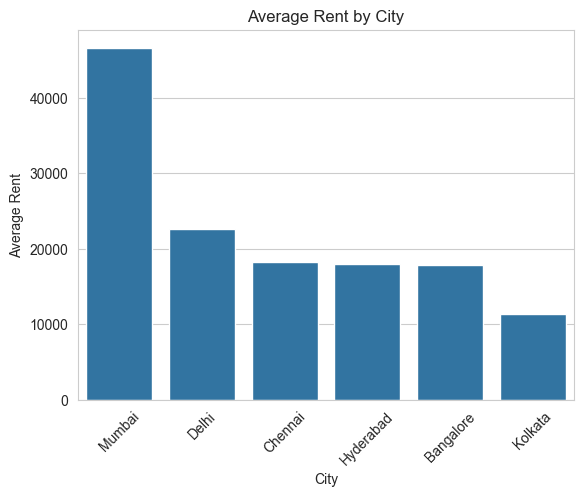

In [66]:
# b. Average Rent by City
city_rent = df_cleaned.groupby('City')['Rent'].mean().sort_values(ascending=False)
sns.barplot(x=city_rent.index, y=city_rent.values)
plt.title('Average Rent by City')
plt.xlabel('City')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.savefig("../plots/average_rent_by_city.png")

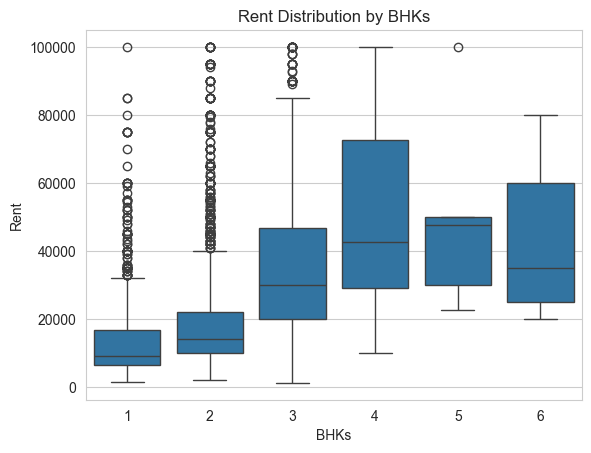

In [86]:
# c. Rent vs. Number of BHK
sns.boxplot(data=df_cleaned, x='BHK', y='Rent')
plt.title('Rent Distribution by BHKs')
plt.xlabel('BHKs')
plt.ylabel('Rent')
plt.savefig("../plots/rent_vs_bhk.png")

## Observations:
1. Median rent increases with more BHKs
2. 1 & 2 BHKs have many outliers
3. 4 to 6 BHKs have wider Inter Quartile Range
4. Flat rent range stabilizes after 4 BHK

### Dropping unwanted column

In [6]:
df_cleaned.drop(columns=['Floor'], inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_13612\3797953449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Floor'], inplace=True)


In [7]:
df_cleaned.columns

Index(['BHK', 'Rent', 'Size', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom'],
      dtype='object')

### Preprocessing data

One Hot Encoding categorical columns and scaling numerical columns

In [8]:
import sys
import os

# Add the src directory to Python path
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)



In [9]:
from utils import preprocess_data

In [11]:
X, y, scaler = preprocess_data(df_cleaned)
X.head()

,BHK,Size,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,-0.00234,0.386663,False,False,False,True,False,False,True
1,-0.00234,-0.189269,False,False,False,True,False,True,False
2,-0.00234,0.194686,False,False,False,True,False,True,False
3,-0.00234,-0.189269,False,False,False,True,False,False,True
4,-0.00234,-0.093280,False,False,False,True,False,False,True


Save scaler

In [13]:
import joblib

In [14]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']